In [1]:
import os
import pickle
from collections import Counter

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
cd ../../src

/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/src


# Data


In [3]:
vinitra_data_path = '../data/flipped_classrooms/features/roberta_vinitra_mirko_julien_features.pkl'

with open(vinitra_data_path, 'rb') as fp:
    flipped = pickle.load(fp)

# Functions

In [4]:
# aesthetic
def choose_colours(n=1):
    palette = [
        '#E5F9F8', '#F92A82', '#FF9F1C', '#FFBF69', '#CBF3F0', '#2EC4B6'
    ]
    if n>6:
        replace = True
    else:
        replace=False
    return np.random.choice(palette, n, replace=replace)

palette = {
    'tp': '#FF9F1C',
    'fp': '#cbf3f0',
    'fn': '#F92A82',
    'A': '#E5F9F8', 
    'B': '#F92A82', 
    'C': '#FF9F1C', 
    'D': '#FFBF69', 
    'E': '#CBF3F0', 
    'F': '#2EC4B6',
    1.0: '#E5F9F8', 
    2.0: '#F92A82', 
    3.0: '#FF9F1C', 
    4.0: '#FFBF69', 
    5.0: '#CBF3F0', 
    6.0: '#2EC4B6',
    'absolute': '#FF9F1C',
    'cluster': '#cbf3f0',
    'dataset': '#F92A82', 
}

In [5]:
def plot_absolute_per_cluster(demos, clusters, title):
    unique_demos = np.unique(demos)
    unique_clusters = np.unique(clusters)
    for c, cluster in enumerate(unique_clusters):
        cluster_index = [i for i in range(len(clusters)) if clusters[i] == cluster]
        cluster_demo = [demos[idx] for idx in cluster_index]
       
        counter = {}
        for demo in unique_demos:
            counter[demo] = len([i for i in range(len(cluster_demo)) if cluster_demo[i] == demo])
        plt.figure(figsize=(4, 3))
        plt.bar(range(len(counter)), [counter[demo] for demo in unique_demos], color=palette[cluster])
        plt.title('Distribution of {} for cluster {}'.format(title, cluster))
        plt.xticks(range(len(counter)), unique_demos, rotation=30)
        plt.savefig('../reports/flipped/dis_absolute_{}_cluster_{}.svg'.format(title, cluster), format='svg')
        plt.show()
            
            
def plot_propcluster_per_cluster(demos, clusters, title):
    unique_demos = np.unique(demos)
    unique_clusters = np.unique(clusters)
    for c, cluster in enumerate(unique_clusters):
        cluster_index = [i for i in range(len(clusters)) if clusters[i] == cluster]
        cluster_demo = [demos[idx] for idx in cluster_index]
       
        counter = {}
        for demo in unique_demos:
            counter[demo] = len([i for i in range(len(cluster_demo)) if cluster_demo[i] == demo])
            counter[demo] /= len(cluster_demo)
        plt.figure(figsize=(5, 3))
        plt.bar(range(len(counter)), [counter[demo] for demo in unique_demos], color=palette[cluster])
        plt.title('Cluster proportional distribution of {} for cluster {}'.format(title, cluster))
        plt.ylim([0, 1])
        plt.xticks(range(len(counter)), unique_demos, rotation=30)
        plt.savefig('../reports/flipped/dis_propcluster_{}_cluster_{}.svg'.format(title, cluster), format='svg')
        plt.show()
        
def plot_propdataset_per_cluster(demos, clusters, title):
    unique_demos = np.unique(demos)
    unique_clusters = np.unique(clusters)
    for c, cluster in enumerate(unique_clusters):
        cluster_index = [i for i in range(len(clusters)) if clusters[i] == cluster]
        cluster_demo = [demos[idx] for idx in cluster_index]
       
        counter = {}
        for demo in unique_demos:
            counter[demo] = len([i for i in range(len(cluster_demo)) if cluster_demo[i] == demo])
            counter[demo] /= len(demos)
        plt.figure(figsize=(5, 3))
        plt.bar(range(len(counter)), [counter[demo] for demo in unique_demos], color=palette[cluster])
        plt.title('Dataset proportional distribution of {} for cluster {}'.format(title, cluster))
        plt.ylim([0, 1])
        plt.xticks(range(len(counter)), unique_demos, rotation=30)
        plt.savefig('../reports/flipped/dis_propdataset_{}_cluster_{}.svg'.format(title, cluster), format='svg')
        plt.show()
        
        
def plot_counts(demographics, title):
    counter = Counter(demographics)
    unique_demos = np.unique(demographics)
    
    # absolute count
    plt.figure(figsize=(5, 3))
    plt.bar(range(len(unique_demos)), [counter[demo] for demo in unique_demos], color=palette['absolute'])
    
    plt.xticks(range(len(unique_demos)), unique_demos, rotation=30)
    plt.title('Absolute distribution of {}'.format(title))
    plt.savefig('../reports/flipped/generaleda_{}_absolute.svg'.format(title), format='svg')
    plt.show()
    
    
    # Proportional to dataset
    counter_prop = {demo: counter[demo]/len(demographics) for demo in unique_demos}
    plt.figure(figsize=(5, 3))
    plt.bar(range(len(unique_demos)), [counter_prop[demo] for demo in unique_demos], color=palette['cluster'])
    
    plt.xticks(range(len(unique_demos)), unique_demos, rotation=30)
    plt.ylim([0, 1])
    plt.title('Proportional distribution of {}'.format(title))
    plt.savefig('../reports/flipped/generaleda_{}_proportional.svg'.format(title), format='svg')
    plt.show()



            

# EDA


In [6]:
# collection of the data in list format
genders = [flipped[idx]['gender'] for idx in range(191)]
country_diploma = [flipped[idx]['country_diploma'] for idx in range(191)]
clusters = [flipped[idx]['cluster_aied_paola'] for idx in range(191)]
labels = [flipped[idx]['pass'] for idx in range(191)]


data = {
    'gender': genders,
    'country_diploma': country_diploma,
    'labels': labels
}

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
GENDER


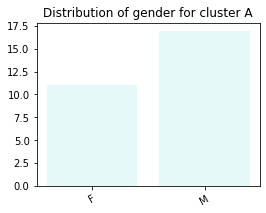

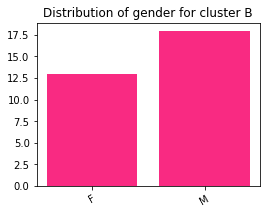

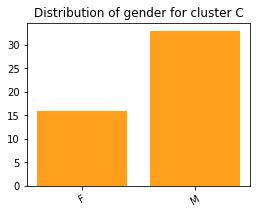

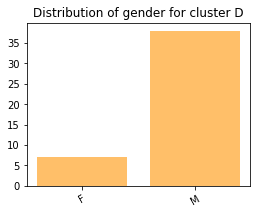

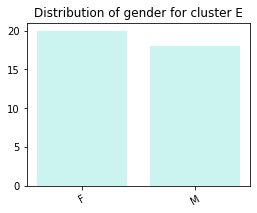

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
COUNTRY_DIPLOMA


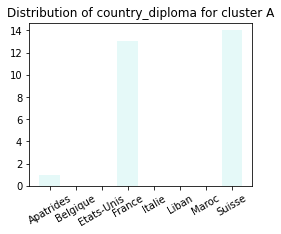

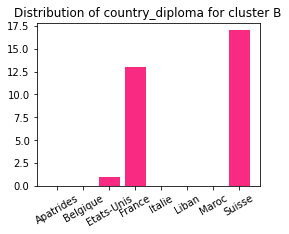

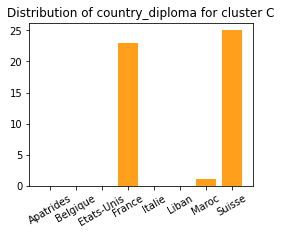

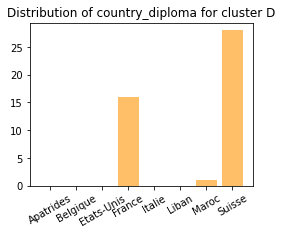

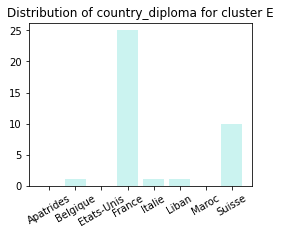

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
LABELS


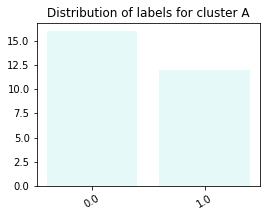

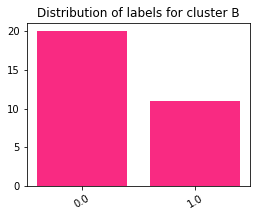

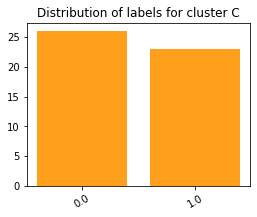

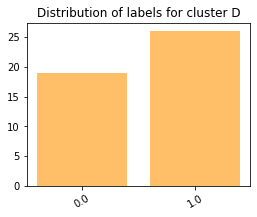

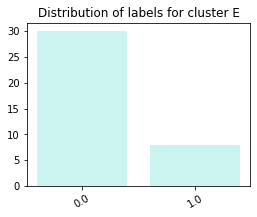

In [7]:
for demo in data:
    print('* ' * 50)
    print(demo.upper())
    plot_absolute_per_cluster(data[demo], clusters, demo)

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
GENDER


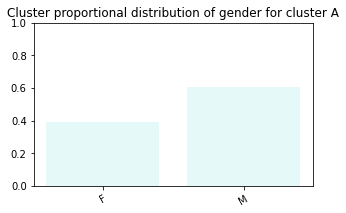

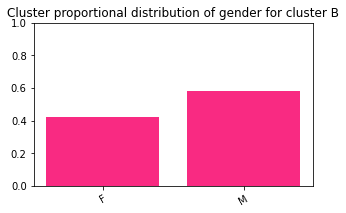

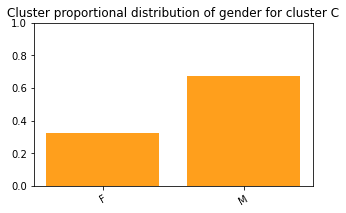

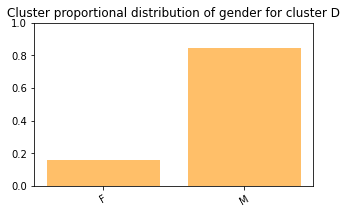

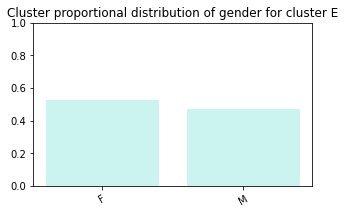

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
COUNTRY_DIPLOMA


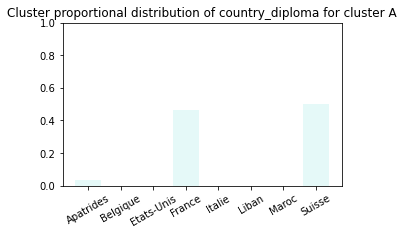

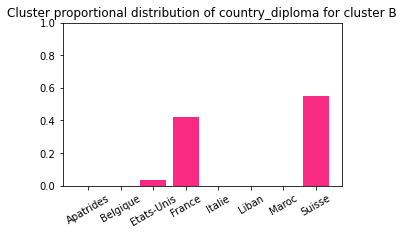

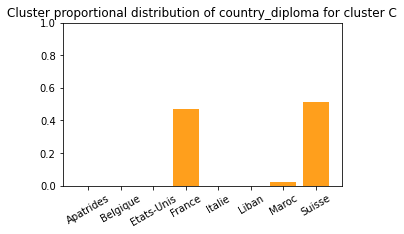

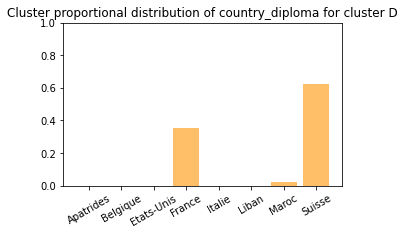

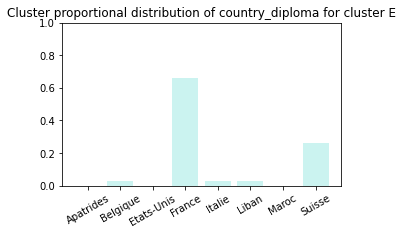

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
LABELS


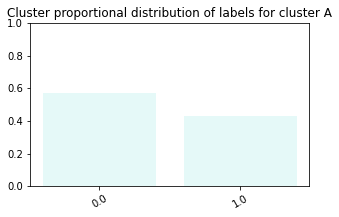

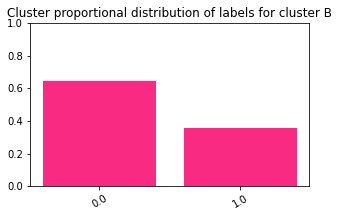

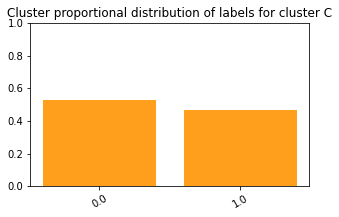

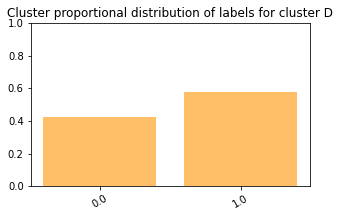

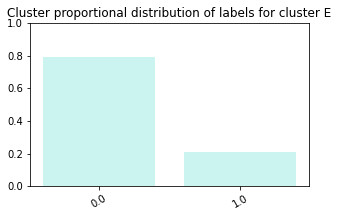

In [8]:
for demo in data:
    print('* ' * 50)
    print(demo.upper())
    plot_propcluster_per_cluster(data[demo], clusters, demo)

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
GENDER


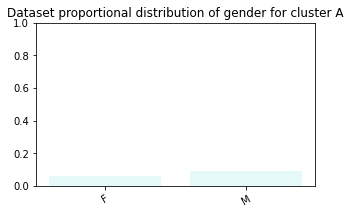

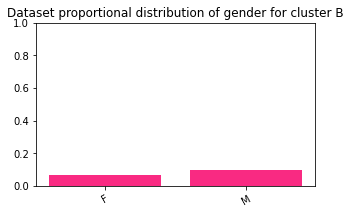

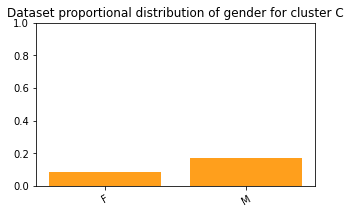

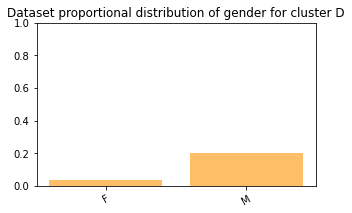

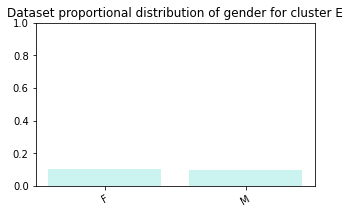

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
COUNTRY_DIPLOMA


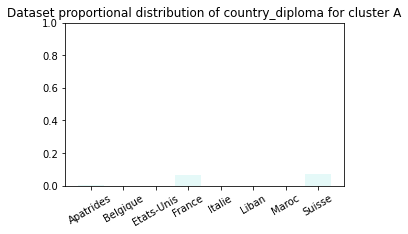

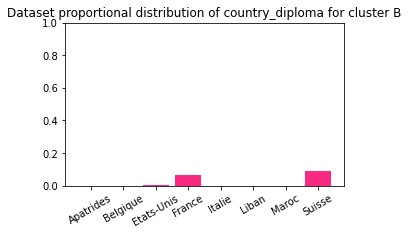

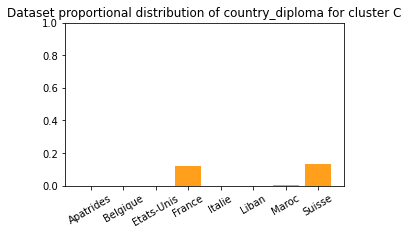

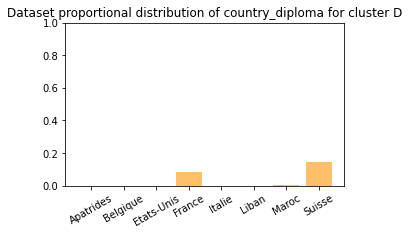

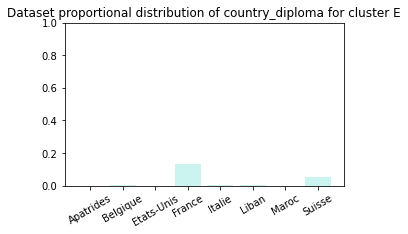

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
LABELS


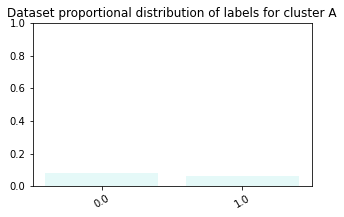

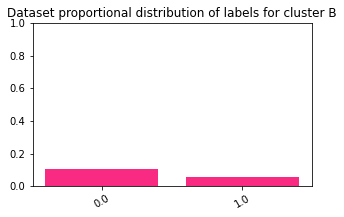

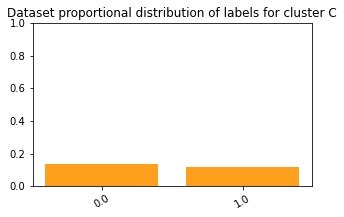

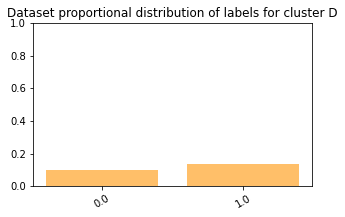

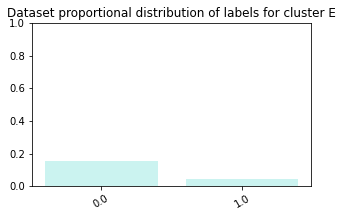

In [9]:
for demo in data:
    print('* ' * 50)
    print(demo.upper())
    plot_propdataset_per_cluster(data[demo], clusters, demo)

# General EDA

In [9]:
temp_counter = Counter(data['gender'])
temp_counter = {k:v/len(data['gender']) for k, v in temp_counter.items()}

In [10]:
temp_counter

{'M': 0.6492146596858639, 'F': 0.3507853403141361}

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
GENDER


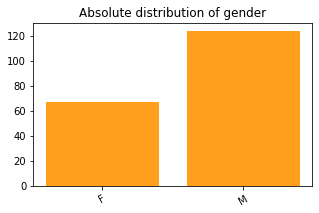

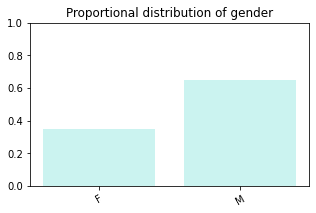

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
COUNTRY_DIPLOMA


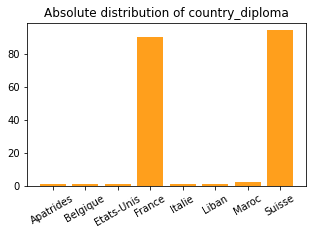

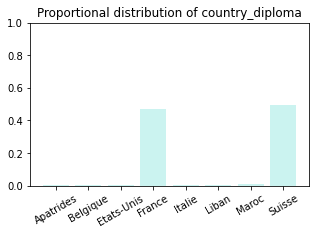

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
LABELS


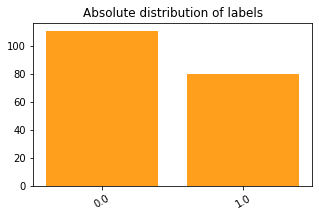

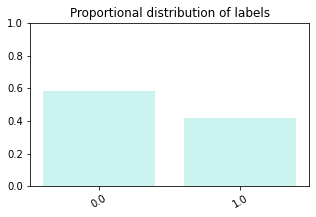

In [10]:
for demo in data:
    print('* ' * 50)
    print(demo.upper())
    plot_counts(data[demo], demo)

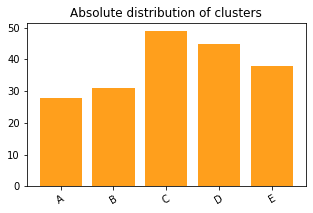

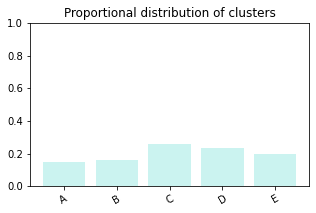

In [11]:
plot_counts(clusters, 'clusters')

In [16]:
clust@ers

['D',
 'B',
 'B',
 'E',
 'E',
 'E',
 'C',
 'D',
 'E',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'A',
 'D',
 'C',
 'D',
 'E',
 'E',
 'B',
 'B',
 'A',
 'E',
 'D',
 'D',
 'D',
 'C',
 'E',
 'D',
 'B',
 'D',
 'E',
 'C',
 'A',
 'A',
 'C',
 'E',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'A',
 'D',
 'A',
 'D',
 'A',
 'A',
 'C',
 'D',
 'D',
 'C',
 'C',
 'D',
 'A',
 'C',
 'A',
 'D',
 'C',
 'C',
 'E',
 'B',
 'B',
 'B',
 'B',
 'C',
 'B',
 'C',
 'D',
 'E',
 'E',
 'D',
 'B',
 'B',
 'D',
 'A',
 'E',
 'A',
 'B',
 'A',
 'E',
 'A',
 'E',
 'D',
 'D',
 'C',
 'E',
 'B',
 'C',
 'C',
 'D',
 'E',
 'C',
 'D',
 'D',
 'D',
 'E',
 'E',
 'C',
 'D',
 'E',
 'E',
 'C',
 'E',
 'B',
 'D',
 'C',
 'A',
 'C',
 'D',
 'D',
 'C',
 'C',
 'C',
 'C',
 'B',
 'E',
 'D',
 'D',
 'E',
 'C',
 'A',
 'B',
 'C',
 'C',
 'E',
 'D',
 'B',
 'E',
 'D',
 'C',
 'C',
 'E',
 'C',
 'C',
 'B',
 'D',
 'B',
 'D',
 'C',
 'D',
 'C',
 'E',
 'B',
 'E',
 'B',
 'B',
 'D',
 'C',
 'C',
 'E',
 'E',
 'C',
 'B',
 'B',
 'C',
 'D',
 'D',
 'E',
 'E',
 'E',
 'D',
 'D',
 'A'

In [18]:
indices = [idx for idx in range(len(data['country_diploma'])) 
           if 'France' in data['country_diploma'][idx] or 'Suisse' in data['country_diploma'][idx]
          ]
restricted_data = {
    'gender': [data['gender'][idx] for idx in indices],
    'country_diploma': [data['country_diploma'][idx] for idx in indices],
    'labels': [data['labels'][idx] for idx in indices],
    'clusters': [clusters[idx] for idx in indices ]
    
}
combined = ['{}_{}'.format(restricted_data['gender'][i], restricted_data['country_diploma'][i]) for i in range(len(restricted_data['gender']))]
triple = ['{}_{}_{}'.format(restricted_data['gender'][i], restricted_data['country_diploma'][i], restricted_data['labels'][i]) for i in range(len(restricted_data['gender']))]



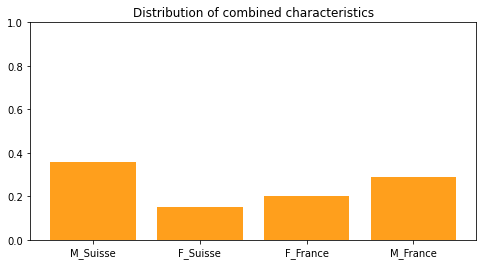

In [19]:
combined_counter = Counter(combined)
combined_counter = {k:v/len(combined) for k, v in combined_counter.items()}
keys = list(combined_counter.keys())

plt.figure(figsize=(8, 4))
plt.bar(range(len(keys)), [combined_counter[key] for key in keys], color=choose_colours(1))
plt.xticks(range(len(keys)), keys)
plt.ylim([0, 1])
plt.title('Distribution of combined characteristics')
plt.show()



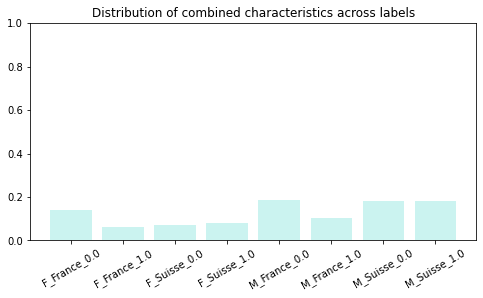

In [20]:
triple_counter = Counter(triple)
triple_counter = {k:v/len(triple) for k, v in triple_counter.items()}
keys = list(triple_counter.keys())
keys.sort()

plt.figure(figsize=(8, 4))
plt.bar(range(len(keys)), [triple_counter[key] for key in keys], color=choose_colours(1))
plt.xticks(range(len(keys)), keys, rotation=30)
plt.ylim([0, 1])
plt.title('Distribution of combined characteristics across labels')
plt.show()




In [21]:
label_gender = ['{}_{}'.format(restricted_data['labels'][i], restricted_data['gender'][i]) for i in range(len(restricted_data['gender']))]
label_country = ['{}_{}'.format(restricted_data['labels'][i], restricted_data['country_diploma'][i]) for i in range(len(restricted_data['gender']))]



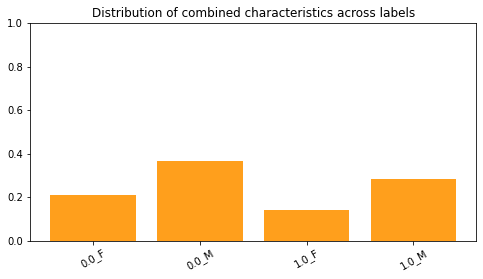

In [22]:
labelgender_counter = Counter(label_gender)
labelgender_counter = {k:v/len(label_gender) for k, v in labelgender_counter.items()}
keys = list(labelgender_counter.keys())
keys.sort()

plt.figure(figsize=(8, 4))
plt.bar(range(len(keys)), [labelgender_counter[key] for key in keys], color=choose_colours(1))
plt.xticks(range(len(keys)), keys, rotation=30)
plt.ylim([0, 1])
plt.title('Distribution of combined characteristics across labels')
plt.show()





In [29]:
unique_clusters = np.unique(clusters)
unique_clusters.sort()

cluster_data = {}
combined_dem = [
    'f_rancho', 'm_rancho', 'f_tierra_linda', 'm_tierra_linda'
]
for uc in unique_clusters:
    indices = [i for i in range(len(restricted_data['clusters'])) if restricted_data['clusters'][i] == uc]
    cluster_data[uc] = {
        'gender': [restricted_data['gender'][idx] for idx in indices],
        'country_diploma': [restricted_data['country_diploma'][idx] for idx in indices] ,
        'combined': ['{}_{}'.format(restricted_data['gender'][idx], restricted_data['country_diploma'][idx]) for idx in indices],
        'gender_label': ['{}_{}'.format(restricted_data['gender'][idx], restricted_data['labels'][idx]) for idx in indices],
        'country_diploma_label': ['{}_{}'.format(restricted_data['country_diploma'][idx], restricted_data['labels'][idx]) for idx in indices]
    }
    
    cluster_data[uc]['gender_counter'] = Counter(cluster_data[uc]['gender'])
    cluster_data[uc]['gender_counter'] = {k: v/len(indices) for k, v in cluster_data[uc]['gender_counter'].items()}
    
    cluster_data[uc]['country_diploma_counter'] = Counter(cluster_data[uc]['country_diploma'])
    cluster_data[uc]['country_diploma_counter'] = {k: v/len(indices) for k, v in cluster_data[uc]['country_diploma_counter'].items()}
    
    cluster_data[uc]['combined_counter'] = Counter(cluster_data[uc]['combined'])
    cluster_data[uc]['combined_counter'] = {k: v/len(indices) for k, v in cluster_data[uc]['combined_counter'].items()}
    
    cluster_data[uc]['gender_label_counter'] = Counter(cluster_data[uc]['gender_label'])
    cluster_data[uc]['gender_label_counter'] = {k: v/len(indices) for k, v in cluster_data[uc]['gender_label_counter'].items()}
    
    cluster_data[uc]['country_diploma_label_counter'] = Counter(cluster_data[uc]['country_diploma_label'])
    cluster_data[uc]['country_diploma_label_counter'] = {k: v/len(indices) for k, v in cluster_data[uc]['country_diploma_label_counter'].items()}
    
cluster_data['general'] = {}
cluster_data['general']['gender_counter'] = Counter(restricted_data['gender'])
cluster_data['general']['gender_counter'] = {k: v/len(restricted_data['gender']) for k, v in cluster_data['general']['gender_counter'].items()}

cluster_data['general']['country_diploma_counter'] = Counter(restricted_data['country_diploma'])
cluster_data['general']['country_diploma_counter'] = {k: v/len(restricted_data['gender']) for k, v in cluster_data['general']['country_diploma_counter'].items()}


cluster_data['general']['combined_counter'] = Counter(['{}_{}'.format(restricted_data['gender'][idx], restricted_data['country_diploma'][idx]) for idx in range(len(restricted_data['gender']))])
cluster_data['general']['combined_counter'] = {k: v/len(restricted_data['gender']) for k, v in cluster_data['general']['combined_counter'].items()}

cluster_data['general']['gender_label_counter'] = Counter(['{}_{}'.format(restricted_data['gender'][idx], restricted_data['labels'][idx]) for idx in range(len(restricted_data['gender']))])
cluster_data['general']['gender_label_counter'] = {k: v/len(restricted_data['gender']) for k, v in cluster_data['general']['gender_label_counter'].items()}

cluster_data['general']['country_diploma_label_counter'] = Counter(['{}_{}'.format(restricted_data['country_diploma'][idx], restricted_data['labels'][idx]) for idx in range(len(restricted_data['gender']))])
cluster_data['general']['country_diploma_label_counter'] = {k: v/len(restricted_data['gender']) for k, v in cluster_data['general']['country_diploma_label_counter'].items()}



    
    

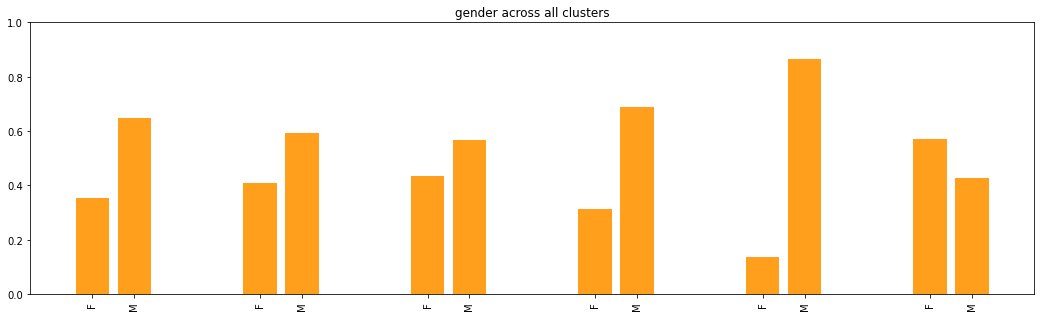

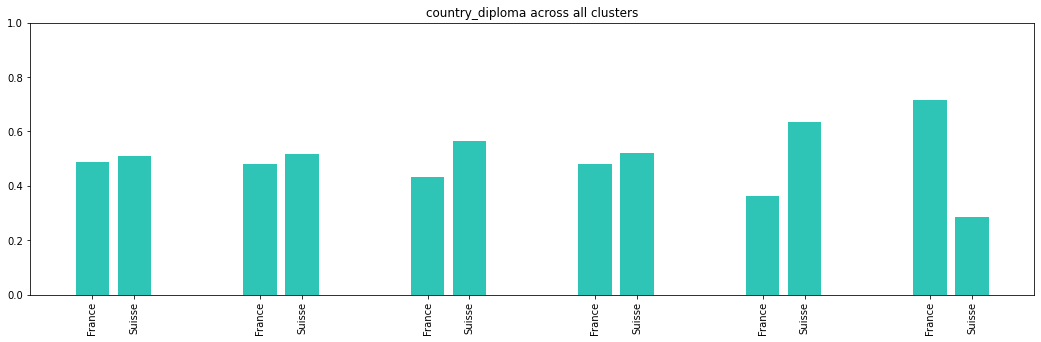

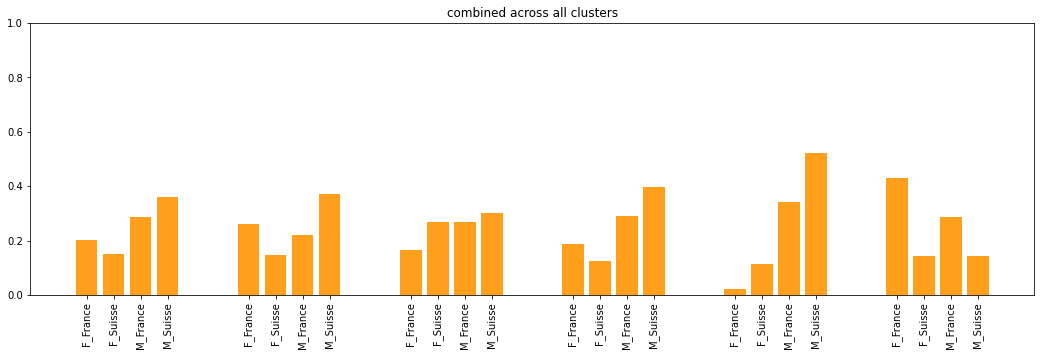

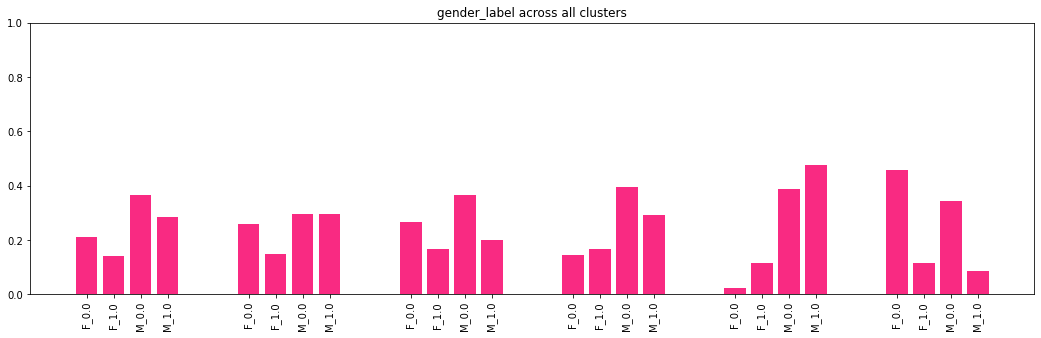

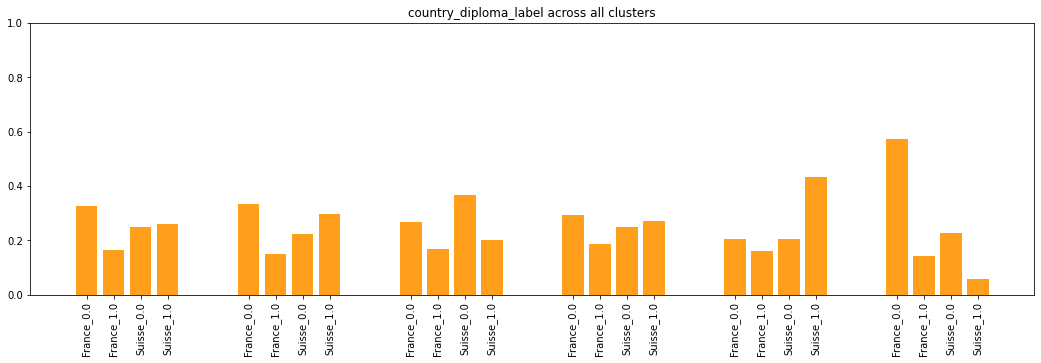

In [30]:
categs = ['gender', 'country_diploma', 'combined', 'gender_label', 'country_diploma_label']
for cat in categs:
    x = 0
    xs = []
    ticks = []
    bars = []
    for cluster in ['general', *unique_clusters]:
        keys = list(cluster_data[cluster]['{}_counter'.format(cat)].keys())
        keys.sort()
        cluster_xs = list(range(len(cluster_data[cluster]['{}_counter'.format(cat)])))
        cluster_xs = [(cx * 1) + x for cx in cluster_xs]
        xs = xs + cluster_xs
        x = xs[-1] + 3
        ticks = ticks + [k for k in keys]
        bars = bars + [cluster_data[cluster]['{}_counter'.format(cat)][key] for key in keys]
    
    plt.figure(figsize=(18, 5))
    plt.title('{} across all clusters'.format(cat))
    plt.bar(xs, bars, color=choose_colours(1))
    plt.ylim([0, 1])
    plt.xticks(xs, ticks, rotation=90)
    plt.show()